## Microsoft Capstone for MariBelajar.org
**Subtheme: Education**

Driver file 2 for FY21 ✈ 
- Contains encoded and cleaned FY21 data 
- Data will be featured to **only have one independent variable** (its duration), and dependent will remain as total participants.
- Will be using a **simple linear regression model** due to the simplicity of the features and low cardinality 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Loading excel to dataframe
fy21_cleaned_encoded = pd.read_excel('/content/drive/My Drive/MariBelajar/FY21_Encoded.xlsx')

In [ ]:
fy21_cleaned_encoded = fy21_cleaned_encoded[:154]

In [ ]:
fy21_cleaned_encoded.head()

,Unnamed: 0,FiscalYear,Quarter_Q1,Quarter_Q2,Quarter_AY21,TanggalPelaksanaan,Durasi/Jam,NamaKegiatan,Program,Segmen_HE,Segmen_HEK12,Segmen_K12,Segmen_Corporate,GovernmentOfficial,Non-GovernmentOfficial,TotalPeserta
0,0,2021.0,1.0,0.0,0.0,2020-09-15,4.0,Azure Fundamental for Higher Ed,Azure Higher Ed,1.0,0.0,0.0,0.0,12.0,10.0,22.0
1,1,2021.0,1.0,0.0,0.0,2020-09-22,4.0,Designing Azure for Academic Infrastructure,Azure Higher Ed,1.0,0.0,0.0,0.0,22.0,31.0,53.0
2,2,2021.0,1.0,0.0,0.0,2020-09-28,4.0,Designing Virtual Labs with Azure,Azure Higher Ed,1.0,0.0,0.0,0.0,18.0,13.0,31.0
3,3,2021.0,1.0,0.0,0.0,2020-09-04,3.0,Creating A Virtual Classroom using Microsoft T...,GTP,1.0,0.0,0.0,0.0,96.0,0.0,96.0
4,4,2021.0,1.0,0.0,0.0,2020-09-28,6.0,Creating Smart Classroom with Microsoft 365,GTP,1.0,0.0,0.0,0.0,39.0,0.0,39.0


In [ ]:
X = fy21_cleaned_encoded['Durasi/Jam'] # Independent variable
y = fy21_cleaned_encoded['TotalPeserta'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const         33.744732
Durasi/Jam    10.383880
dtype: float64

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           TotalPeserta   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.280
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.134
Time:                        15:00:07   Log-Likelihood:                -592.35
No. Observations:                 107   AIC:                             1189.
Df Residuals:                     105   BIC:                             1194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7447     17.359      1.944      0.0

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


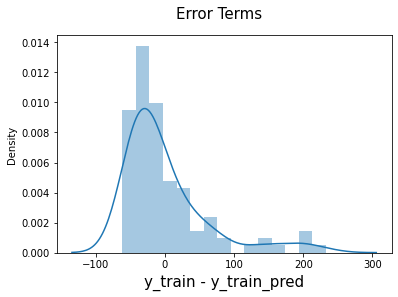

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

48     54.512493
57     54.512493
19     64.896373
125    54.512493
110    54.512493
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

83.38956666102314

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

-0.38999654150748686

To conclude, the error rates are still off by a lot even when reducing the features to the only one with negative correlation to the dependent variable. 

Hence, the data is:
- Not suitable for machine learning regression predictions, as variables does not have significant correlation; are not statistically significant 
- Lacks number in data (Only 154 entries roughly) which isn't enough for a good model to train itself

What MariBelajar.org can do to solve this issue ✈
- Increase the data acquisition, or bring other relevant data to the table
- A different data science solution, such as not a machine learning / predictive analytics approach. **Instead, recommending: dashboarding, descriptive analytics, reporting, business intelligence insights**